In [44]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# Overleaf Link: https://www.overleaf.com/7717938235zvyzkyhqrxdb
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import random

In [46]:
try:

    # Create a new model
    m = gp.Model("mip1")

    # Create variables
    x = m.addVar(vtype=GRB.BINARY, name="x")
    y = m.addVar(vtype=GRB.BINARY, name="y")
    z = m.addVar(vtype=GRB.BINARY, name="z")

    # Set objective
    m.setObjective(x + y + 2 * z, GRB.MAXIMIZE)

    # Add constraint: x + 2 y + 3 z <= 4
    m.addConstr(x + 2 * y + 3 * z <= 4, "c0")

    # Add constraint: x + y >= 1
    m.addConstr(x + y >= 1, "c1")

    # Optimize model
    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))

    print('Obj: %g' % m.ObjVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
x 1
y 0
z 1
Obj: 3


In [47]:
## Import Data
nodes = []
edges = []

node_file = open('nodes.txt', 'r')
node_lines = node_file.readlines()
for node_line in node_lines:
  nodes.append(node_line.replace('\n', ''))

node_file.close()

edge_file = open('topology.txt', 'r')
edge_lines = edge_file.readlines()[1:]
for edge_line in edge_lines:
  edge = edge_line.split()
  if not (edge[0:3] in edges or [edge[1], edge[0], edge[2]] in edges):
    edges.append(edge[0:3])

edge_file.close()
  
print(edges)
print(nodes)


[['9', '10', '1000000000'], ['9', '8', '1000000000'], ['9', '4', '1000000000'], ['8', '3', '1000000000'], ['8', '7', '1000000000'], ['8', '4', '1000000000'], ['3', '4', '1000000000'], ['2', '0', '1000000000'], ['1', '10', '1000000000'], ['1', '6', '1000000000'], ['0', '7', '1000000000'], ['0', '4', '1000000000'], ['7', '10', '1000000000'], ['7', '6', '1000000000'], ['6', '10', '1000000000'], ['6', '5', '1000000000'], ['5', '4', '1000000000'], ['4', '10', '1000000000']]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


{('0', '2'): Text(3.135954414042673, 2.2118988055900672, '1000000000'),
 ('0', '7'): Text(4.038217395738533, 3.644816955166691, '1000000000'),
 ('0', '4'): Text(3.236135822819101, 2.3035789442413734, '1000000000'),
 ('1', '10'): Text(3.8055657527511197, 0.6217865230768052, '1000000000'),
 ('1', '6'): Text(4.097120500823987, 1.8532629006063046, '1000000000'),
 ('3', '8'): Text(1.821146903876158, 3.0924031538767234, '1000000000'),
 ('3', '4'): Text(2.708644900158168, 2.1317604849990825, '1000000000'),
 ('4', '9'): Text(3.374818588198856, 2.384430252907811, '1000000000'),
 ('4', '8'): Text(1.9905804371974414, 1.4148265491599719, '1000000000'),
 ('4', '5'): Text(3.1957770717238523, 0.3462999113831122, '1000000000'),
 ('4', '10'): Text(2.770484699095021, 0.2732052428348475, '1000000000'),
 ('5', '6'): Text(3.3797380854122903, 1.3967976514651281, '1000000000'),
 ('6', '7'): Text(3.864121020087321, 2.8459196312896644, '1000000000'),
 ('6', '10'): Text(2.9544457127834587, 1.3237029829168634, '

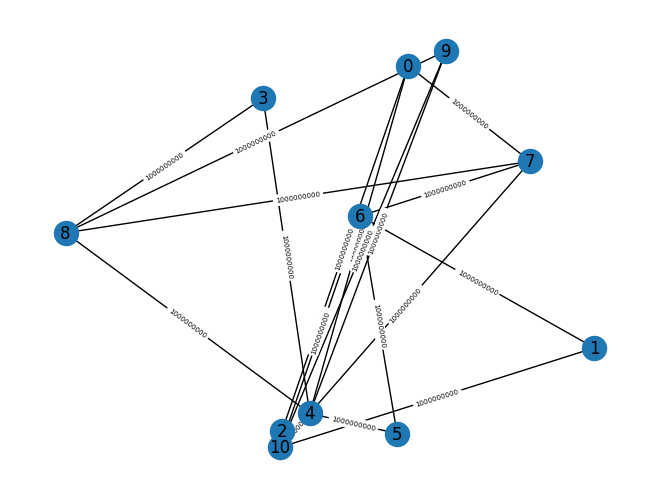

In [48]:
## Draw Network
G = nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(nodes)):
  G.nodes[str(i)]['pos'] = (random.uniform(0,5), random.uniform(0,5))
for edge in edges:
  G.add_edge(edge[0], edge[1], bandwidth = edge[2])

pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, with_labels=True)
labels = nx.get_edge_attributes(G,'bandwidth')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size=5)


In [49]:
#formatted as a list of lists of lists, where each entry corresponds to a
#timestamp, increasing as time progresses. Each list within is a list 
#of lists where each corresponds to demands for that node pair at 
#that time, e.g. demands[0][3][7] is the demand initially from node 4
#to node 8
demands = []
demand_file = open('demand.txt', 'r')
demand_lines = demand_file.readlines()
for demand_line in demand_lines:
  demand = demand_line.split()
  t_demand = [demand[i:i + 11] for i in range(0, len(demand), 11)]
  demands.append(t_demand)

max_demand_matrix = None
max_total = 0
for timestamp in demands:
  total = 0
  for i in range(len(timestamp)):
    for j in range(len(timestamp[0])):
      total += float(timestamp[i][j])
  if total > max_total:
    max_total = total
    max_demand_matrix = timestamp
  
#mapping for each edge
edge_mapping = {}

#also gotta do DFS to find all paths

from collections import defaultdict

class Graph:
  
    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices
         
        # default dictionary to store graph
        self.graph = defaultdict(list)
  
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)

    def printAllPathsUtil(self, u, d, visited, path, lst):
 
        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)
 
        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            lst.append(path.copy())
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path, lst)
                     
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False
  
  
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d, lst):
 
        # Mark all the vertices as not visited
        visited =[False]*(self.V)
 
        # Create an array to store paths
        path = []
 
        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path, lst)
        

g = Graph(11)
for edge in edges:
  g.addEdge(int(edge[0]), int(edge[1]))
  g.addEdge(int(edge[1]), int(edge[0]))

paths = []

routes = []
for node in nodes:
  for dest_node in nodes:
    if node != dest_node:
      g.printAllPaths(int(node), int(dest_node), paths)
      paths.sort(key = len)
      for p in paths[0:5]:
        routes.append(p)
      paths = []



In [50]:
edge_sols = {}
try:
   # Create a new model
    m = gp.Model("te1")

    for edge in edges:
      edge_mapping[str(edge)] = None

    edge_vars = []
    # Create variables - for each edge
    e0 = m.addVar(vtype=GRB.CONTINUOUS, name="e0")
    e1 = m.addVar(vtype=GRB.CONTINUOUS, name="e1")
    e2 = m.addVar(vtype=GRB.CONTINUOUS, name="e2")
    e3 = m.addVar(vtype=GRB.CONTINUOUS, name="e3")
    e4 = m.addVar(vtype=GRB.CONTINUOUS, name="e4")
    e5 = m.addVar(vtype=GRB.CONTINUOUS, name="e5")
    e6 = m.addVar(vtype=GRB.CONTINUOUS, name="e6")
    e7 = m.addVar(vtype=GRB.CONTINUOUS, name="e7")
    e8 = m.addVar(vtype=GRB.CONTINUOUS, name="e8")
    e9 = m.addVar(vtype=GRB.CONTINUOUS, name="e9")
    e10 = m.addVar(vtype=GRB.CONTINUOUS, name="e10")
    e11 = m.addVar(vtype=GRB.CONTINUOUS, name="e11")
    e12 = m.addVar(vtype=GRB.CONTINUOUS, name="e12")
    e13 = m.addVar(vtype=GRB.CONTINUOUS, name="e13")
    e14 = m.addVar(vtype=GRB.CONTINUOUS, name="e14")
    e15 = m.addVar(vtype=GRB.CONTINUOUS, name="e15")
    e16 = m.addVar(vtype=GRB.CONTINUOUS, name="e16")
    e17 = m.addVar(vtype=GRB.CONTINUOUS, name="e17")
    edge_vars.append(e0)
    edge_vars.append(e1)
    edge_vars.append(e2)
    edge_vars.append(e3)
    edge_vars.append(e4)
    edge_vars.append(e5)
    edge_vars.append(e6)
    edge_vars.append(e7)
    edge_vars.append(e8)
    edge_vars.append(e9)
    edge_vars.append(e10)
    edge_vars.append(e11)
    edge_vars.append(e12)
    edge_vars.append(e13)
    edge_vars.append(e14)
    edge_vars.append(e15)
    edge_vars.append(e16)
    edge_vars.append(e17)

    for i in range(len(edges)):
      edge_mapping[str(edges[i])] = edge_vars[i]
      
    #transform all paths to lists of edges
    #make variables for paths
    #map them
    #profit

    route_map = {}

    for route in routes:
      path_for_route = []
      for i in range(len(route)):
        if len(route) - i > 1:
          try:
            e = edge_mapping[str([str(route[i]), str(route[i+1]), '1000000000'])]
          except:
            e = edge_mapping[str([str(route[i+1]), str(route[i]), '1000000000'])]
          path_for_route.append(e)
      route_map[str(route)] = path_for_route
    path_num = 0
    for route in route_map:
      v = m.addVar(vtype = GRB.CONTINUOUS, name = "path" + str(path_num))
      path_num += 1
      edges_of_path = route_map[route]
      route_map[route] = (v, edges_of_path)

    # Set objective - maximize flow sum over all edges
    m.setObjective(e1 + e2 + e3 + e4 + e5 + e6 + e7 + e8 + e9 + 
                   e10 + e11 + e12 + e13 + e14 + e15 + e16 + e17, GRB.MAXIMIZE)
    
    # Constraint 0 - Every path is the sum of its edges
    # WRONG: Need to figure out how to properly define
    #for route in route_map:
      #path_var = route_map[route][0]
      #edges_vars = route_map[route][1]

      #edge_sum = 0
      #for edge in edge_vars:
        #edge_sum += edge
      #m.addConstr(edge_sum == path_var)

    # Constraint 1 - adding up to the necessary throughput for each timestamp, i.e. demand
      # for each path:
        # constrain flow through path <= demand on path
        #m.addConstr(flow[path] <= demand[path])
        # we know the edge vars for every path so iterate over every single demand and just add it to that edges constraint,, ez
    
    for i in range(len(max_demand_matrix)):
      for j in range(len(max_demand_matrix[0])):
        if i != j:
          route_vars= []
          for route in route_map:
            origin = 0
            end = 0
            div = route.index(',')
            origin = int(route[1:div])
            div1 = route.rfind(',')
            end = int(route[div1 + 1: len(route) - 1])
            if origin == i and end == j:
              route_vars.append(route_map[route][0])
          demand = max_demand_matrix[i][j]
          d_var = m.addVar(vtype = GRB.CONTINUOUS, name = 'dem' + str(i) + ', ' + str(j))
          m.addConstr(d_var == float(demand))
          paths_sum = 0
          for path_var in route_vars:
            paths_sum += path_var
          m.addConstr(paths_sum <= d_var)
    
    # Constraint 1.5 - every edge is the sum of paths its in
    m.update()

    for e_var in edge_vars:
      path_sum = 0
      for route in route_map:
        p_var = route_map[route][0]
        edge_vs = route_map[route][1]
        for ed in edge_vs:
          if ed.VarName == e_var.VarName:
            path_sum += p_var
      m.addConstr(path_sum == e_var)

    # Constraint 2 - ensuring allocations do not exceed capacity
        # for each path:
          # for each edge in path:
            # constrain edge allocation to not exceed capacity
    for edge in edge_vars:
      m.addConstr(edge <= 1000000000)

    # Optimize model
    m.update()

    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))

    print('Obj: %g' % m.ObjVal)

    for i in range(len(edge_vars)):
      edge_sols[i] = edge_vars[i].X

    print(e4.X * 100 / 1000000000)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 256 rows, 670 columns and 2456 nonzeros
Model fingerprint: 0xc26cd9b1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+02, 1e+09]
Presolve removed 131 rows and 114 columns
Presolve time: 0.03s
Presolved: 125 rows, 556 columns, 2097 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3028635e+10   3.131220e+09   0.000000e+00      0s
     131    8.7200655e+07   0.000000e+00   0.000000e+00      0s

Solved in 131 iterations and 0.05 seconds (0.00 work units)
Optimal objective  8.720065545e+07
e0 3.38367e+06
e1 8.77715e+06
e2 5.91591e+06
e3 2.41351e+06
e4 1.17482e+07
e5 4.19418e+06
e6 2.0152e+06
e7 4.53618e+06
e8 3.58486e+06
e9

{0: 3383666.3868539995, 1: 8777148.026329001, 2: 5915914.832484, 3: 2413506.903445, 4: 11748172.302722996, 5: 4194184.996146, 6: 2015200.66236, 7: 4536175.493927999, 8: 3584861.609224, 9: 3628256.7627849993, 10: 11399179.999511, 11: 5787932.409769001, 12: 5713416.984983001, 13: 5265894.933865, 14: 1666739.5061450005, 15: 4780671.451854, 16: 3231864.548909, 17: 2541534.02417}


{('0', '2'): Text(0.7077075407845999, 0.4548159840171121, '4536175.493927999'),
 ('0', '7'): Text(0.17256963701372996, -0.377874786865306, '11399179.999511'),
 ('0',
  '4'): Text(0.17256966681605218, 0.37787482208623224, '5787932.409769001'),
 ('1',
  '10'): Text(0.8412534901160897, -5.689534249286865e-08, '3584861.609224'),
 ('1',
  '6'): Text(-0.05911972544886995, 0.12945410810029448, '3628256.7627849993'),
 ('3',
  '8'): Text(-0.1423149196000808, 2.7093019494550674e-09, '2413506.903445'),
 ('3', '4'): Text(-0.3985877482805049, 0.872785536415005, '2015200.66236'),
 ('4', '9'): Text(-0.11972277749818683, -0.0769411592215779, '5915914.832484'),
 ('4', '8'): Text(-0.3985878376874716, -0.11703589224254063, '4194184.996146'),
 ('4', '5'): Text(-0.8071768185920237, 0.5187411158261456, '3231864.548909'),
 ('4', '10'): Text(0.09319639697293591, 0.10755437825184311, '2541534.02417'),
 ('5', '6'): Text(-0.9594929708161518, 1.76104631710583e-08, '4780671.451854'),
 ('6', '7'): Text(-0.807176848

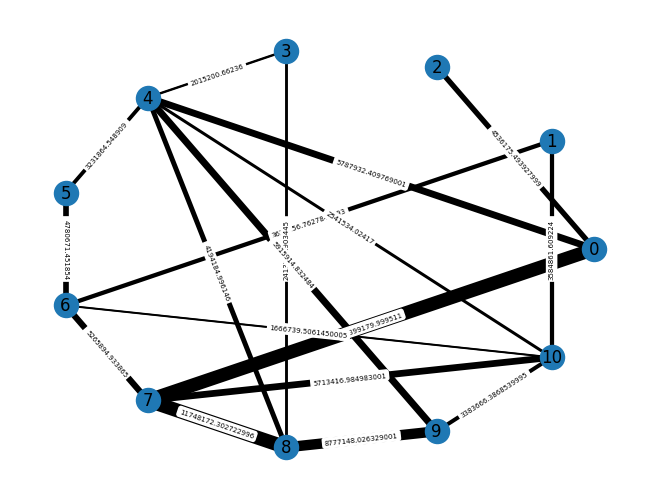

In [51]:
##VISUALISING STEP 4
#Need to reorder edge shit to make sure right values are assigned to each.
print(edge_sols)
Go = nx.Graph()
Go.add_nodes_from(nodes)
# makes the positions of the graphs synced

for i in range(len(nodes)):
  Go.nodes[str(i)]['pos'] = pos[str(i)]

ct = 0
for edge in edges:
  Go.add_edge(edge[0], edge[1], bandwidth = edge_sols[ct])
  ct += 1

edge_widths = []
max_width = max(edge_sols.values())
for sol in edge_sols:
  edge_widths.append(10 * (edge_sols[sol]/max_width))

pos = nx.circular_layout(Go)
nx.draw(Go,pos, with_labels=True)
labels = nx.get_edge_attributes(Go,'bandwidth')
for edge in Go.edges(data = 'bandwidth'):
  nx.draw_networkx_edges(Go, pos, edgelist = [edge], width = 10 * edge[2]/max_width)
nx.draw_networkx_edge_labels(Go,pos,edge_labels=labels, font_size=5)

In [52]:
##STEP 5 - Andrii attempt
edge_sols_step5 = {}
try:
   # Create a new model
    m = gp.Model("te1")

    for edge in edges:
      edge_mapping[str(edge)] = None

    edge_vars = []
    # Create variables - for each edge
    e0 = m.addVar(vtype=GRB.CONTINUOUS, name="e0")
    e1 = m.addVar(vtype=GRB.CONTINUOUS, name="e1")
    e2 = m.addVar(vtype=GRB.CONTINUOUS, name="e2")
    e3 = m.addVar(vtype=GRB.CONTINUOUS, name="e3")
    e4 = m.addVar(vtype=GRB.CONTINUOUS, name="e4")
    e5 = m.addVar(vtype=GRB.CONTINUOUS, name="e5")
    e6 = m.addVar(vtype=GRB.CONTINUOUS, name="e6")
    e7 = m.addVar(vtype=GRB.CONTINUOUS, name="e7")
    e8 = m.addVar(vtype=GRB.CONTINUOUS, name="e8")
    e9 = m.addVar(vtype=GRB.CONTINUOUS, name="e9")
    e10 = m.addVar(vtype=GRB.CONTINUOUS, name="e10")
    e11 = m.addVar(vtype=GRB.CONTINUOUS, name="e11")
    e12 = m.addVar(vtype=GRB.CONTINUOUS, name="e12")
    e13 = m.addVar(vtype=GRB.CONTINUOUS, name="e13")
    e14 = m.addVar(vtype=GRB.CONTINUOUS, name="e14")
    e15 = m.addVar(vtype=GRB.CONTINUOUS, name="e15")
    e16 = m.addVar(vtype=GRB.CONTINUOUS, name="e16")
    e17 = m.addVar(vtype=GRB.CONTINUOUS, name="e17")
    edge_vars.append(e0)
    edge_vars.append(e1)
    edge_vars.append(e2)
    edge_vars.append(e3)
    edge_vars.append(e4)
    edge_vars.append(e5)
    edge_vars.append(e6)
    edge_vars.append(e7)
    edge_vars.append(e8)
    edge_vars.append(e9)
    edge_vars.append(e10)
    edge_vars.append(e11)
    edge_vars.append(e12)
    edge_vars.append(e13)
    edge_vars.append(e14)
    edge_vars.append(e15)
    edge_vars.append(e16)
    edge_vars.append(e17)

    for i in range(len(edges)):
      edge_mapping[str(edges[i])] = edge_vars[i]
      
    #transform all paths to lists of edges
    #make variables for paths
    #map them
    #profit

    route_map = {}

    for route in routes:
      path_for_route = []
      for i in range(len(route)):
        if len(route) - i > 1:
          try:
            e = edge_mapping[str([str(route[i]), str(route[i+1]), '1000000000'])]
          except:
            e = edge_mapping[str([str(route[i+1]), str(route[i]), '1000000000'])]
          path_for_route.append(e)
      route_map[str(route)] = path_for_route
    path_num = 0
    for route in route_map:
      v = m.addVar(vtype = GRB.CONTINUOUS, name = "path" + str(path_num))
      path_num += 1
      edges_of_path = route_map[route]
      route_map[route] = (v, edges_of_path)

    # Var for max_edge
    max_edge = m.addVar(vtype = GRB.CONTINUOUS, name = "max_edge")

    # Set objective - maximize flow sum over all edges
    m.setObjective(max_edge, GRB.MINIMIZE)
    
    # Constraint 0 - Every path is the sum of its edges
    # WRONG: Need to figure out how to properly define
    #for route in route_map:
      #path_var = route_map[route][0]
      #edges_vars = route_map[route][1]

      #edge_sum = 0
      #for edge in edge_vars:
        #edge_sum += edge
      #m.addConstr(edge_sum == path_var)

    # Constraint 1 - adding up to the necessary throughput for each timestamp, i.e. demand
      # for each path:
        # constrain flow through path <= demand on path
        #m.addConstr(flow[path] <= demand[path])
        # we know the edge vars for every path so iterate over every single demand and just add it to that edges constraint,, ez
    
    for i in range(len(max_demand_matrix)):
      for j in range(len(max_demand_matrix[0])):
        if i != j:
          route_vars= []
          for route in route_map:
            origin = 0
            end = 0
            div = route.index(',')
            origin = int(route[1:div])
            div1 = route.rfind(',')
            end = int(route[div1 + 1: len(route) - 1])
            if origin == i and end == j:
              route_vars.append(route_map[route][0])
          demand = max_demand_matrix[i][j]
          d_var = m.addVar(vtype = GRB.CONTINUOUS, name = 'dem' + str(i) + ', ' + str(j))
          m.addConstr(d_var == float(demand))
          paths_sum = 0
          for path_var in route_vars:
            paths_sum += path_var
          m.addConstr(paths_sum == d_var)
    
    # Constraint 1.5 - every edge is the sum of paths its in
    m.update()

    for e_var in edge_vars:
      path_sum = 0
      for route in route_map:
        p_var = route_map[route][0]
        edge_vs = route_map[route][1]
        for ed in edge_vs:
          if ed.VarName == e_var.VarName:
            path_sum += p_var
      m.addConstr(path_sum == e_var)

    # Constraint 2 - ensuring allocations do not exceed capacity
        # for each path:
          # for each edge in path:
            # constrain edge allocation to not exceed capacity
    for edge in edge_vars:
      m.addConstr(edge <= 1000000000)

    m.addConstr(max_edge == gp.max_(edge_vars))

    # Optimize model
    m.update()

    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))

    print('Obj: %g' % m.ObjVal)

    for i in range(len(edge_vars)):
      edge_sols_step5[i] = edge_vars[i].X

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 256 rows, 671 columns and 2456 nonzeros
Model fingerprint: 0x91156e3a
Model has 1 general constraint
Variable types: 671 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+02, 1e+09]
Presolve removed 141 rows and 218 columns
Presolve time: 0.01s
Presolved: 115 rows, 453 columns, 1690 nonzeros
Variable types: 453 continuous, 0 integer (0 binary)

Root relaxation: objective 4.536175e+06, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4536175.4939 453

{0: 880974.728242, 1: 287038.446792, 2: 1514800.146233, 3: 1310914.95193, 4: 2787298.765695, 5: 1890683.452826, 6: 2053323.2548669998, 7: 4536175.493928, 8: 810912.0668960001, 9: 317384.790993, 10: 1933522.614758, 11: 4536175.493928, 12: 1584040.865112, 13: 1950960.960025, 14: 2965820.936234, 15: 4536175.493927999, 16: 4536175.493927999, 17: 4089220.2084489996}


{('0', '2'): Text(0.7077075407845999, 0.4548159840171121, '4536175.493928'),
 ('0', '7'): Text(0.17256963701372996, -0.377874786865306, '1933522.614758'),
 ('0', '4'): Text(0.17256966681605218, 0.37787482208623224, '4536175.493928'),
 ('1',
  '10'): Text(0.8412534901160897, -5.689534249286865e-08, '810912.0668960001'),
 ('1', '6'): Text(-0.05911972544886995, 0.12945410810029448, '317384.790993'),
 ('3',
  '8'): Text(-0.1423149196000808, 2.7093019494550674e-09, '1310914.95193'),
 ('3',
  '4'): Text(-0.3985877482805049, 0.872785536415005, '2053323.2548669998'),
 ('4', '9'): Text(-0.11972277749818683, -0.0769411592215779, '1514800.146233'),
 ('4', '8'): Text(-0.3985878376874716, -0.11703589224254063, '1890683.452826'),
 ('4',
  '5'): Text(-0.8071768185920237, 0.5187411158261456, '4536175.493927999'),
 ('4',
  '10'): Text(0.09319639697293591, 0.10755437825184311, '4089220.2084489996'),
 ('5',
  '6'): Text(-0.9594929708161518, 1.76104631710583e-08, '4536175.493927999'),
 ('6', '7'): Text(-0

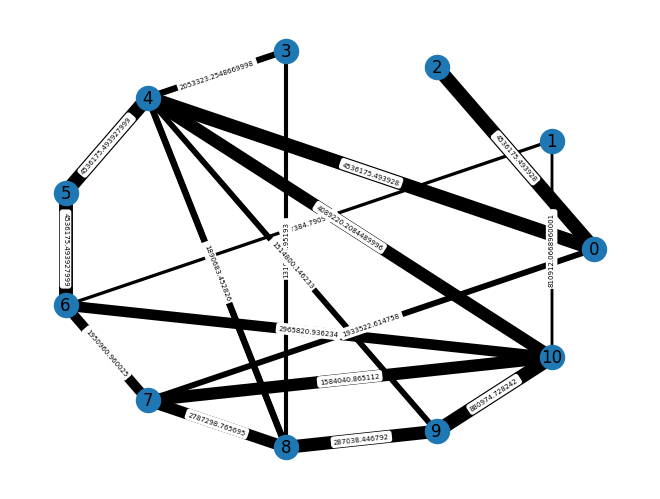

In [56]:
##VISUALISING STEP 5
#Need to reorder edge shit
print(edge_sols_step5)
Gx = nx.Graph()
Gx.add_nodes_from(nodes)

for i in range(len(nodes)):
  Gx.nodes[str(i)]['pos'] = pos[str(i)]

ct = 0

for edge in edges:
  Gx.add_edge(edge[0], edge[1], bandwidth = edge_sols_step5[ct])
  ct += 1

max_width = max(edge_sols_step5.values())

nx.draw(Gx,pos, with_labels=True, width = edge_widths)
for edge in Gx.edges(data = 'bandwidth'):
  nx.draw_networkx_edges(Gx, pos, edgelist = [edge], width = 10 * edge[2]/max_width)
labels = nx.get_edge_attributes(Gx,'bandwidth')
nx.draw_networkx_edge_labels(Gx,pos,edge_labels=labels, font_size=5)

# Random Network Generator
(For Extra Credit Section)

INPUTS: \\
num_nodes - number of nodes \\
network_density - how interconnected nodes of the network are \\
avg_edge_capacity - average capacity of edges \\
edge_capacity_randomness - variation in edge capacity \\
time_stamps - number of time stamps \\
avg_demand - average node-pair demand \\
demand_randomness - variation in demand \\
edge_prob_failure - prob_failure for each edge \\
 \\
OUTPUTS: \\
nodes.txt \\
topology.txt \\
demand.txt \\


In [54]:
import random

def generate_network(num_nodes, net_dens = 0.5, avg_edge_cap = 1000000000, 
                     edge_cap_rand = 0, time_stamps = 10, avg_demand = 20000, demand_rand = 1, 
                     edge_prob_fail = 0.004):
  # GENERATE NODES.TXT
  print("##### nodes.txt #####")
  i = 0
  while (i < num_nodes):
    print(i)
    i += 1

  # GENERATE TOPOLOGY.TXT
  print()
  print("##### topology.txt #####")
  print("to_node from_node capacity prob_failure")
  i = 0
  while (i < num_nodes):
    j = 0
    while (j < num_nodes):
      has_edge = (random.random() < (num_nodes*net_dens)/num_nodes) and (i != j)
      if (has_edge):
        edge_cap = avg_edge_cap+((random.uniform(-1*edge_cap_rand, edge_cap_rand))*avg_edge_cap)
        print(str(j) + " " + str(i) + " " + str(int(edge_cap)) + " " + str(edge_prob_fail))
      j += 1
    i += 1

  # GENERATE DEMAND.TXT
  print()
  print("##### demand.txt #####")
  k = 0
  while (k < time_stamps):
    i = 0
    while (i < num_nodes):
      node_demands = ""
      j = 0
      while (j < num_nodes):
        if (i != j):
          demand = avg_demand+((random.uniform(-1*demand_rand, demand_rand))*avg_demand)
          node_demands += (str(demand) + " ")
        j += 1
      print(node_demands[:-1])
      i += 1
    k += 1

generate_network(200, 0.2, 1000000000, 0.1)

Streaming output truncated to the last 5000 lines.
11 95 1004114285 0.004
12 95 990548737 0.004
16 95 962864817 0.004
20 95 1056515555 0.004
34 95 936522692 0.004
43 95 1026960315 0.004
49 95 1052861405 0.004
50 95 1043819712 0.004
54 95 1065194108 0.004
56 95 1037641408 0.004
60 95 1099437797 0.004
62 95 990465117 0.004
66 95 1086600829 0.004
68 95 1021433204 0.004
73 95 1075655059 0.004
74 95 927952490 0.004
78 95 1047701781 0.004
83 95 1095330482 0.004
84 95 954319222 0.004
86 95 955767940 0.004
102 95 1021939915 0.004
109 95 1049351506 0.004
114 95 1036579573 0.004
120 95 992309692 0.004
122 95 953701827 0.004
143 95 986016057 0.004
145 95 1094038252 0.004
147 95 1035587794 0.004
150 95 1036502075 0.004
155 95 1052829663 0.004
167 95 975732999 0.004
168 95 928940725 0.004
174 95 950993692 0.004
180 95 1086743584 0.004
183 95 1074726581 0.004
185 95 961426290 0.004
190 95 970018212 0.004
194 95 1076337213 0.004
197 95 985748244 0.004
0 96 984058567 0.004
20 96 1064308962 0.004
21 96

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

